In [5]:
import yfinance as yf
import datetime
from datetime import date, timedelta
from datetime import datetime
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

In [11]:

symbol_list = ['EWC','EWA']
data = yf.download(
    symbol_list, 
    start='2014-01-01', 
    end='2024-03-31'
)['Adj Close']
# Creating a column as date
data['TradeDate']=data.index
# create a Pandas dataframe 
df = pd.DataFrame(data)
def stationarity(a, cutoff = 0.05):
  if adfuller(a)[1] < cutoff:
    print("The series is stationary")
    print(adfuller(a))
    print("p-value = ", adfuller(a)[1])
  else:
    print("The series is NOT stationary at the 5% level of significance")
    print(adfuller(a))
    print("p-value = ", adfuller(a)[1])

stationarity(df['EWC'])
stationarity(df['EWA'])

[*********************100%%**********************]  2 of 2 completed


The series is NOT stationary at the 5% level of significance
(-0.6758275194579975, 0.852911803442171, 27, 2549, {'1%': -3.432918025717116, '5%': -2.862674549708125, '10%': -2.567373963123101}, 1290.53372687118)
p-value =  0.852911803442171
The series is NOT stationary at the 5% level of significance
(-1.1764864267241482, 0.6836280008411704, 27, 2549, {'1%': -3.432918025717116, '5%': -2.862674549708125, '10%': -2.567373963123101}, -74.80771375780296)
p-value =  0.6836280008411704


                            OLS Regression Results                            
Dep. Variable:                    EWC   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 4.603e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        14:39:39   Log-Likelihood:                -4244.9
No. Observations:                2577   AIC:                             8494.
Df Residuals:                    2575   BIC:                             8505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1027      0.143    -21.771      0.0

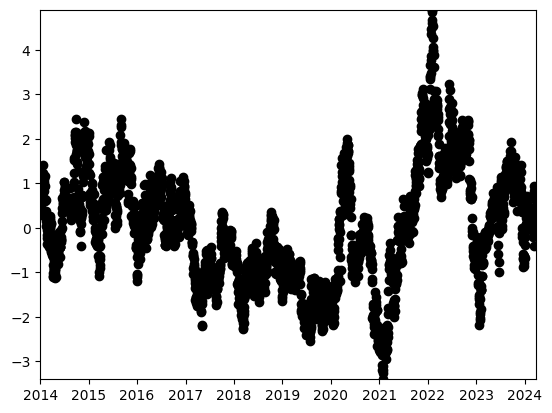

In [12]:
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import pandas as pd

y = data.loc[:, 'EWC']
x = data.loc[:, 'EWA']
z = pd.to_datetime(data.loc[:, "TradeDate"]) # Convert TradeDate to datetime
result = sm.ols(formula='EWC ~ EWA', data=df).fit()

# Displaying OLS regression results using statsmodels summary
print(result.summary())

plt.scatter(x, y, color='black')
intercept = result.params.iloc[0]
beta = result.params.iloc[1]
residuals = y - (intercept + beta * x)

plt.scatter(z, residuals, color='black')

df["Resid"] = residuals
# print(df)
stationarity(df["Resid"])

# Set x-axis limit to start from 2014
start_date = pd.to_datetime("2014-01-01")
plt.xlim(start_date, z.max())

# Set y-axis limit dynamically
plt.ylim(np.min(residuals), np.max(residuals))

plt.show()


In [13]:
joh_model3 = coint_johansen(data, 0, 2)
print(joh_model3.lr1)
print(joh_model3.cvt)

print(joh_model3.evec)

NameError: name 'coint_johansen' is not defined

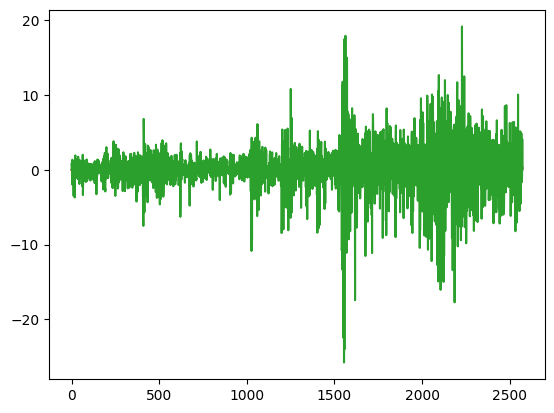

In [ ]:
plt.plot(joh_model3.r0t)

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

symbol_list = ['EWA', 'EWC', 'SPY']
data = yf.download(
    symbol_list,
    start='2014-01-01',
    end='2024-03-31'
)['Adj Close']

def joh_output(res):
    output = pd.DataFrame([res.lr2, res.lr1],
                          index=['max_eig_stat', "trace_stat"])
    print(output.T, '\n')
    print("Critical values (90%, 95%, 99%) of max_eig_stat:\n", res.cvm, '\n')
    print("Critical values (90%, 95%, 99%) of trace_stat:\n", res.cvt, '\n')

# Model 3 (2 lag-difference used) with constant/trend (deterministic) term
joh_model3 = coint_johansen(data, 0, 2)  # k_ar_diff + 1 = K
joh_output(joh_model3)
print("All Cointegrating Vectors:")
print(joh_model3.evec)
print("Cointegrating Vector (Largest Eigenvalue):")
print(joh_model3.evec[:, 0])  # Extract the cointegrating vector associated with the largest eigenvalue

# Model 2: with linear trend, 2 lags
joh_model2 = coint_johansen(data, 1, 2)  # k_ar_diff + 1 = K
joh_output(joh_model2)
print("All Cointegrating Vectors:")
print(joh_model2.evec)
print("Cointegrating Vector (Largest Eigenvalue):")
print(joh_model2.evec[:, 0])  # Extract the cointegrating vector associated with the largest eigenvalue

# Model 1: no constant/trend (deterministic) terms, 2 lags
joh_model1 = coint_johansen(data, -1, 2)  # k_ar_diff + 1 = K
joh_output(joh_model1)
print("All Cointegrating Vectors:")
print(joh_model1.evec)
print("Cointegrating Vector (Largest Eigenvalue):")
print(joh_model1.evec[:, 0])  # Extract the cointegrating vector associated with the largest eigenvalue


[*********************100%%**********************]  3 of 3 completed

   max_eig_stat  trace_stat
0     21.622107   31.145066
1      9.247086    9.522959
2      0.275873    0.275873 

Critical values (90%, 95%, 99%) of max_eig_stat:
 [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values (90%, 95%, 99%) of trace_stat:
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 

All Cointegrating Vectors:
[[ 1.37906615  0.02209604  0.19611973]
 [-0.70845799  0.48672651 -0.10501435]
 [-0.00318054 -0.02511825 -0.0102385 ]]
Cointegrating Vector (Largest Eigenvalue):
[ 1.37906615 -0.70845799 -0.00318054]
   max_eig_stat  trace_stat
0     25.623445   38.637929
1      8.978357   13.014484
2      4.036127    4.036127 

Critical values (90%, 95%, 99%) of max_eig_stat:
 [[21.8731 24.2522 29.2631]
 [15.0006 17.1481 21.7465]
 [ 2.7055  3.8415  6.6349]] 

Critical values (90%, 95%, 99%) of trace_stat:
 [[32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]] 

All Cointegrat

In [14]:
(0.19611973 * data['EWA'] + -0.10501435 * data['EWC'] + -0.0102385 * data['SPY']).plot()

KeyError: 'SPY'

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def compute_half_life(eigenvalues):
    # Compute half-life using unadjusted eigenvalues
    half_life = np.log(2) / np.abs(eigenvalues)
    return half_life

def joh_output(res, model_name):
    # Create a DataFrame to display the results
    output = pd.DataFrame({
        "Eigenvalue Statistic": res.lr2,
        "Max Eigenvalue": res.cvm[:, 0],
        "Trace Statistic": res.lr1,
        "Critical Value (90%)": res.cvt[:, 0],
        "Critical Value (95%)": res.cvt[:, 1],
        "Critical Value (99%)": res.cvt[:, 2]
    })
    output.index.name = "Variable"
    
    # Display the results
    print(f"Johansen Test Results for {model_name} Model:\n")
    print(output, '\n')
    
    # Print eigenvalues
    print(f"Eigenvalues for {model_name} Model:")
    print(res.eig)
    print('\n')
    
    # Calculate and print half-life
    half_life = compute_half_life(res.eig)
    print(f"Half-life for {model_name} Model:")
    print(half_life)
    print('\n')

# Download data
symbol_list = ['EWA', 'EWC', 'SPY']
data = yf.download(symbol_list, start='2014-01-01', end='2024-03-31')['Adj Close']

# Model 3 (2 lag-difference used) with constant/trend (deterministic) term
joh_model3 = coint_johansen(data, 0, 2)  # k_ar_diff +1 = K
joh_output(joh_model3, "Model 3")

# Model 2: with linear trend, 2 lags
joh_model2 = coint_johansen(data, 1, 2)  # k_ar_diff +1 = K
joh_output(joh_model2, "Model 2")

# Model 1: no constant/trend (deterministic) terms, 2 lags
joh_model1 = coint_johansen(data, -1, 2)  # k_ar_diff +1 = K
joh_output(joh_model1, "Model 1")


[*********************100%%**********************]  3 of 3 completed

Johansen Test Results for Model 3 Model:

          Eigenvalue Statistic  Max Eigenvalue  Trace Statistic  \
Variable                                                          
0                    21.622107         18.8928        31.145066   
1                     9.247086         12.2971         9.522959   
2                     0.275873          2.7055         0.275873   

          Critical Value (90%)  Critical Value (95%)  Critical Value (99%)  
Variable                                                                    
0                      27.0669               29.7961               35.4628  
1                      13.4294               15.4943               19.9349  
2                       2.7055                3.8415                6.6349   

Eigenvalues for Model 3 Model:
[0.00836501 0.00358605 0.00010717]


Half-life for Model 3 Model:
[  82.86264432  193.28982111 6467.66996458]


Johansen Test Results for Model 2 Model:

          Eigenvalue Statistic  Max Eigenvalue  Tr

In [ ]:
joh_output(joh_model3, "Model 3")

Johansen Test Results for Model 3 Model:

          Eigenvalue Statistic  Max Eigenvalue  Trace Statistic  \
Variable                                                          
0                    21.622107         18.8928        31.145066   
1                     9.247086         12.2971         9.522959   
2                     0.275873          2.7055         0.275873   

          Critical Value (90%)  Critical Value (95%)  Critical Value (99%)  
Variable                                                                    
0                      27.0669               29.7961               35.4628  
1                      13.4294               15.4943               19.9349  
2                       2.7055                3.8415                6.6349   

Eigenvalues for Model 3 Model:
[0.00836501 0.00358605 0.00010717]


Half-life for Model 3 Model:
[  82.86264432  193.28982111 6467.66996458]




In [15]:
np.log(2) / 0.00836501

82.86268403264852

In [16]:
# Import necessary libraries
import numpy as np
import statsmodels.tsa.vector_ar.vecm as vecm

# Generate some synthetic data for illustration
np.random.seed(42)
t = 100  # Number of observations
# Three time series with linear trends and some random noise
x1 = np.cumsum(np.random.normal(size=t)) + 0.1 * np.arange(t)
x2 = np.cumsum(np.random.normal(size=t)) + 0.05 * np.arange(t)
x3 = np.cumsum(np.random.normal(size=t)) + 0.07 * np.arange(t)

# Stack the series into a 2D array
data = np.column_stack([x1, x2, x3])

# Perform Johansen cointegration test
# det_order: 0 - No intercept or trend, k_ar_diff: Number of lags
coint_test = vecm.coint_johansen(data, det_order=0, k_ar_diff=2)

# Print the test statistics and critical values
print("Eigenvalue Statistics")
print(coint_test.lr1)  # Trace statistics
print("Critical Values (Trace Test)")
print(coint_test.cvt)

print("Maximum Eigenvalue Statistics")
print(coint_test.lr2)  # Maximum eigenvalue statistics
print("Critical Values (Max-Eigenvalue Test)")
print(coint_test.cvm)


Eigenvalue Statistics
[34.062423    9.95652673  1.16803621]
Critical Values (Trace Test)
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Maximum Eigenvalue Statistics
[24.10589627  8.78849052  1.16803621]
Critical Values (Max-Eigenvalue Test)
[[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


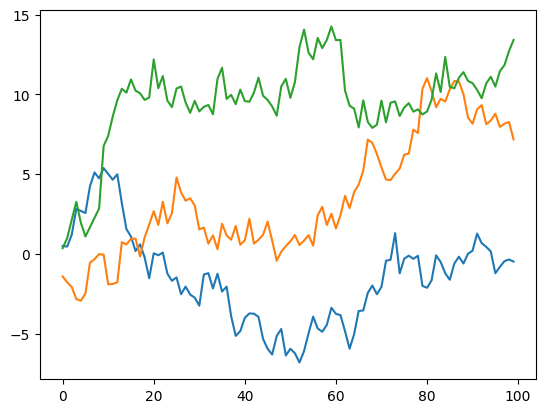

In [17]:
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)

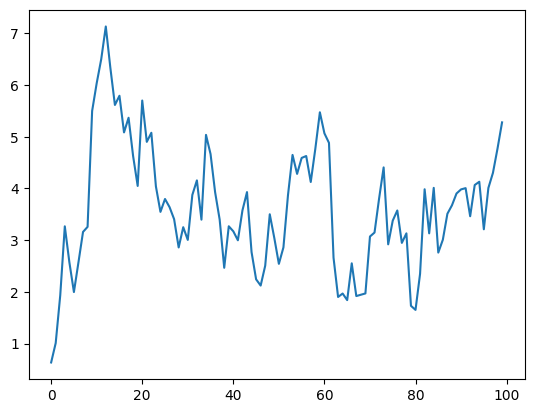

In [18]:
plt.plot((data * coint_test.evec[:, 0]).sum(axis = 1))

(1514, 6)
(1514, 6)


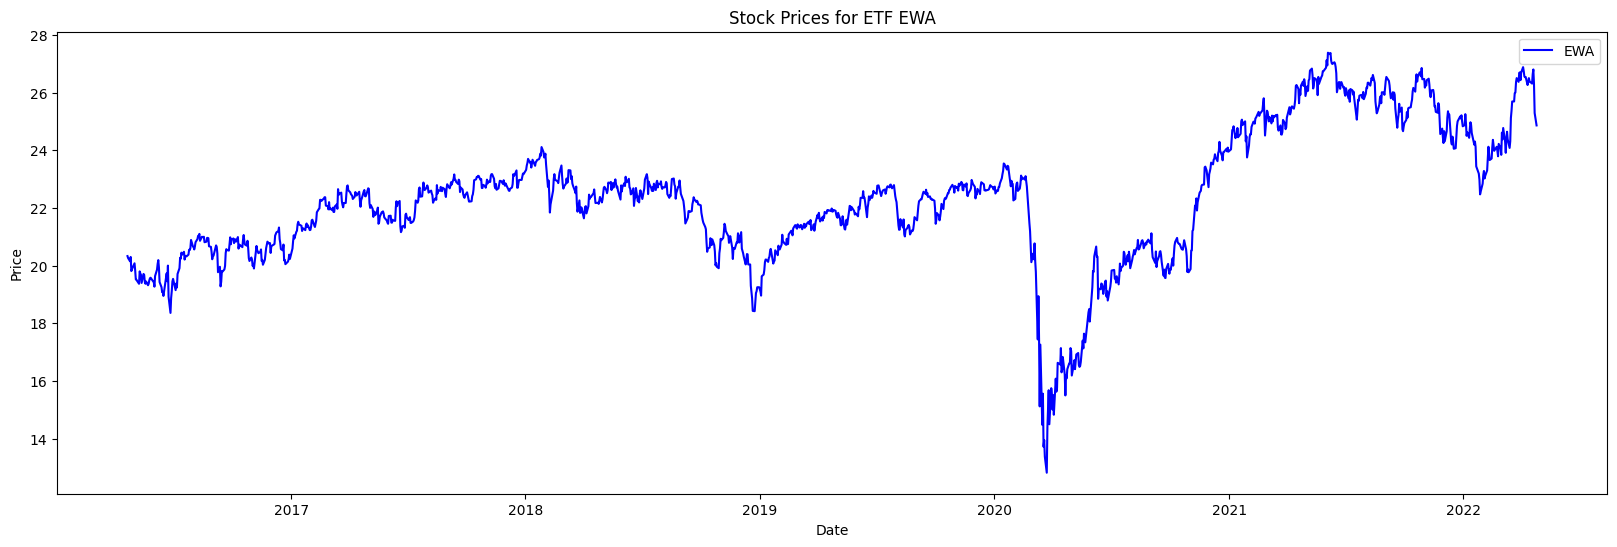

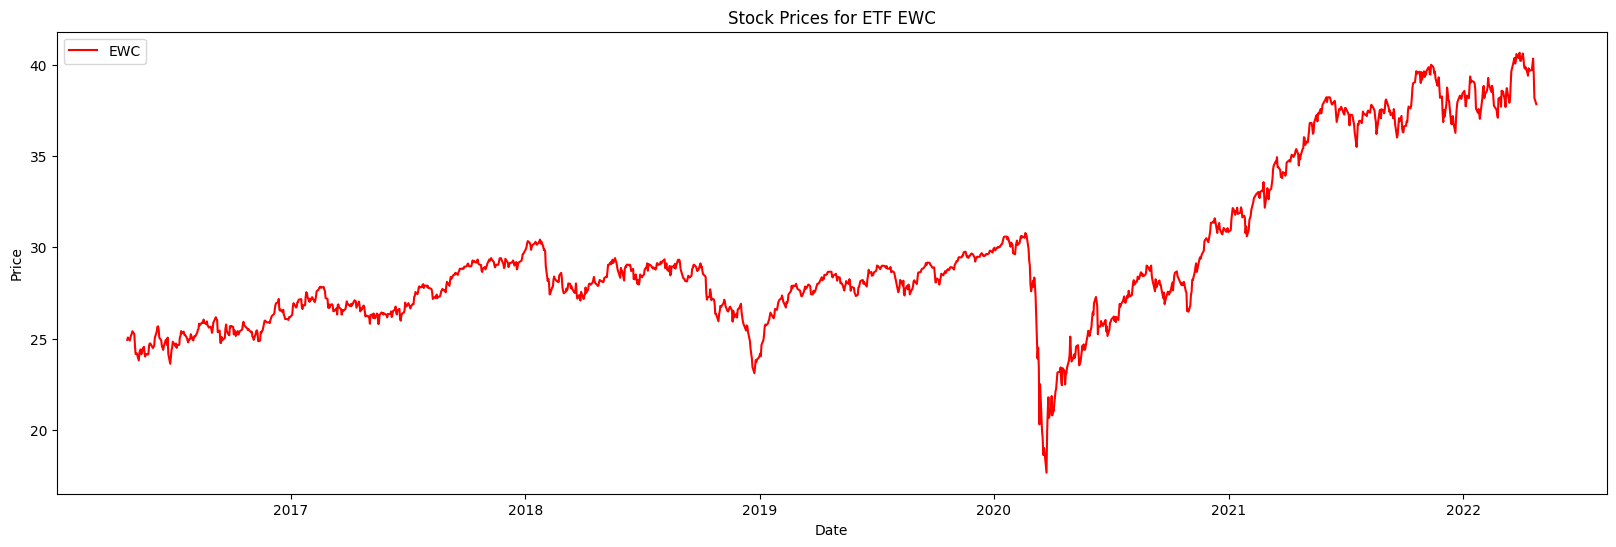

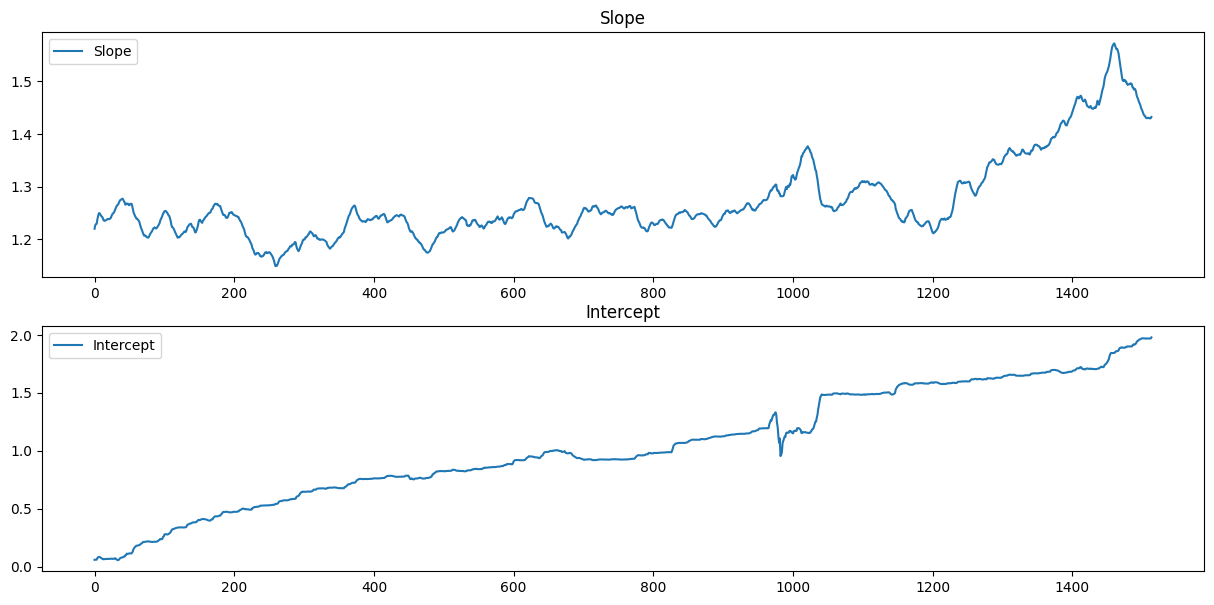

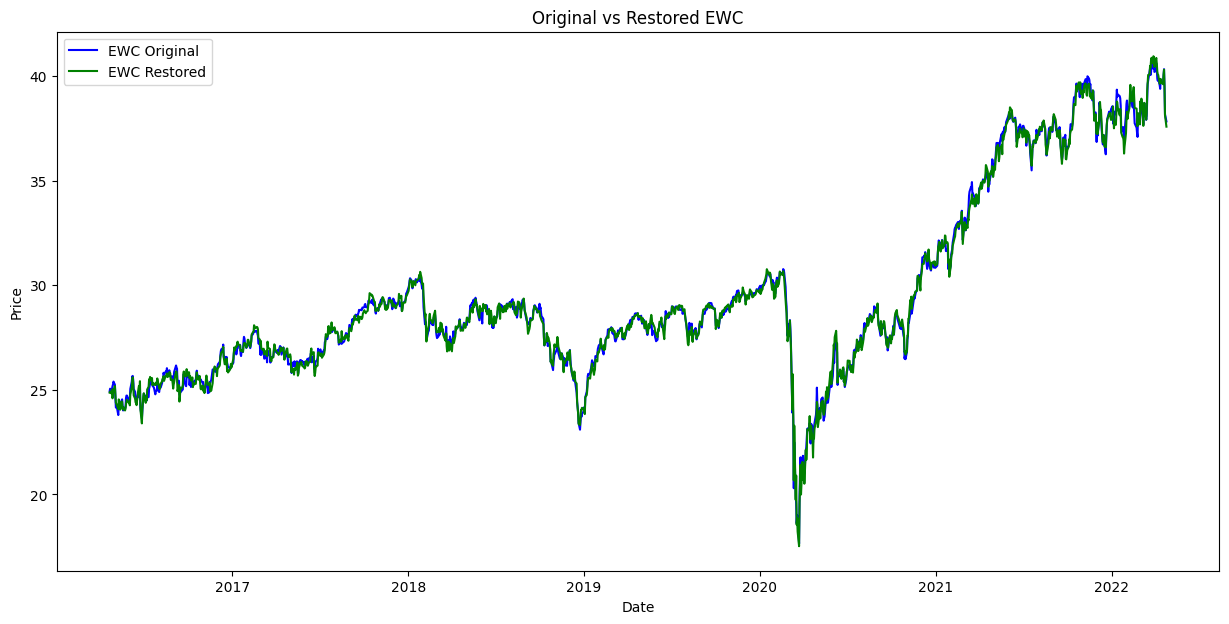

Mean Slope: 1.2724605013127663
Mean Intercept: 1.042372270555793
[[ 0.06002761]
 [ 0.13556298]
 [ 0.06516592]
 ...
 [-0.09186449]
 [ 0.04192882]
 [ 0.24898835]]
(1514, 1)
(1514,)
(1514, 1)
(-13.040064023306067, 2.250827168139927e-24, 1, 1512, {'1%': -3.43468229933681, '5%': -2.8634534376843637, '10%': -2.5677886890239634}, -1039.9932446241787)


In [19]:
# Import necessary libraries
from pykalman import KalmanFilter
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set up date range
startDate = datetime(2016, 4, 21)
endDate = datetime(2022, 4, 26)

# Fetch data for ETF "EWA"
StockDataEWA = yf.download('EWA', start=startDate, end=endDate, progress=False)

# Fetch data for ETF "EWC"
StockDataEWC = yf.download('EWC', start=startDate, end=endDate, progress=False)

# Display shapes of fetched dataframes
print(StockDataEWA.shape)
print(StockDataEWC.shape)

# Plot stock prices
plt.figure(figsize=(20, 6))
plt.plot(StockDataEWA.index, StockDataEWA['Close'], label='EWA', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices for ETF EWA')
plt.legend()
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(StockDataEWC.index, StockDataEWC['Close'], label='EWC', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices for ETF EWC')
plt.legend()
plt.show()

# Extract closing prices
EWAs = StockDataEWA[['Close']].values
EWCs = StockDataEWC[['Close']].values

# Prepare data for Kalman Filter
H = np.insert(EWAs, EWAs.shape[1], 1, axis=1)
H = H.reshape(len(EWAs), 1, 2)
F = np.eye(2)
Q = [[1e-4, 0], [0, 1e-4]]
R = 1
X0 = [0, 0]
P0 = [[1, 0], [0, 1]]

# Initialize Kalman Filter
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                  transition_matrices=F,
                  observation_matrices=H,
                  transition_covariance=Q,
                  observation_covariance=R,
                  initial_state_mean=X0,
                  initial_state_covariance=P0)

# Filtering
state_means, state_covs = kf.filter(EWCs)

# Extract beta (slope) and intercept from state_means
beta = state_means[:, 0]
intc = state_means[:, 1]

# Reshape beta and intercept arrays
beta = beta.reshape(len(beta), 1)
intc = intc.reshape(len(intc), 1)

# Restore EWC based on EWA and estimated parameters
EWC_restored = (EWAs * beta + intc)

# Plot slope and intercept
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(beta, label="Slope")
plt.title('Slope')
plt.legend()

plt.subplot(212)
plt.plot(intc, label="Intercept")
plt.title('Intercept')
plt.legend()
plt.show()

# Plot restored EWC
plt.figure(figsize=(15, 7))
plt.plot(StockDataEWC.index, EWCs, label="EWC Original", color='blue')
plt.plot(StockDataEWC.index, EWC_restored, label="EWC Restored", color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original vs Restored EWC')
plt.legend()
plt.show()

# Print mean slope and intercept
print("Mean Slope:", np.mean(state_means[:, 0]))
print("Mean Intercept:", np.mean(state_means[:, 1]))

import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

# check residuals
resid = EWCs - EWC_restored
print(resid)
# ADF TEST 
print(resid.shape)
print(state_means[:,0].shape)
print(EWCs.shape)

# sresid = resid.reshape(1,len(resid))
adfuller(resid)
print(adfuller(resid))


In [21]:
state_covs

array([[[ 0.00481569, -0.04895152],
        [-0.04895152,  0.99759215]],

       [[ 0.0036536 , -0.04909942],
        [-0.04909942,  0.99767482]],

       [[ 0.00329729, -0.04924424],
        [-0.04924424,  0.99772886]],

       ...,

       [[ 0.00130031, -0.0256798 ],
        [-0.0256798 ,  0.68045189]],

       [[ 0.00132613, -0.02591689],
        [-0.02591689,  0.67979418]],

       [[ 0.00135467, -0.02618366],
        [-0.02618366,  0.67889835]]])

In [31]:
H[-1]

array([[24.86000061,  1.        ]])

In [32]:
kf.filter_update(filtered_state_mean = state_means[-1], filtered_state_covariance = state_covs[-1], observation_matrix=H[-1])

(array([1.43250016, 1.97905694]),
 array([[ 0.00145467, -0.02618366],
        [-0.02618366,  0.67899835]]))

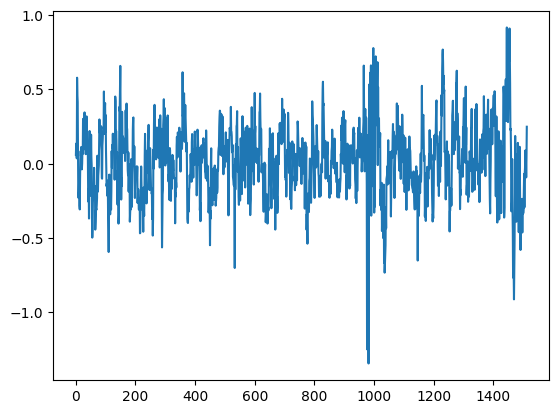

In [23]:
plt.plot(resid)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


ADF Statistic: -3.630183989111752
p-value: 0.005209513182172935
Critical Values: {'1%': -3.432909983133851, '5%': -2.862670998033109, '10%': -2.5673720721755933}


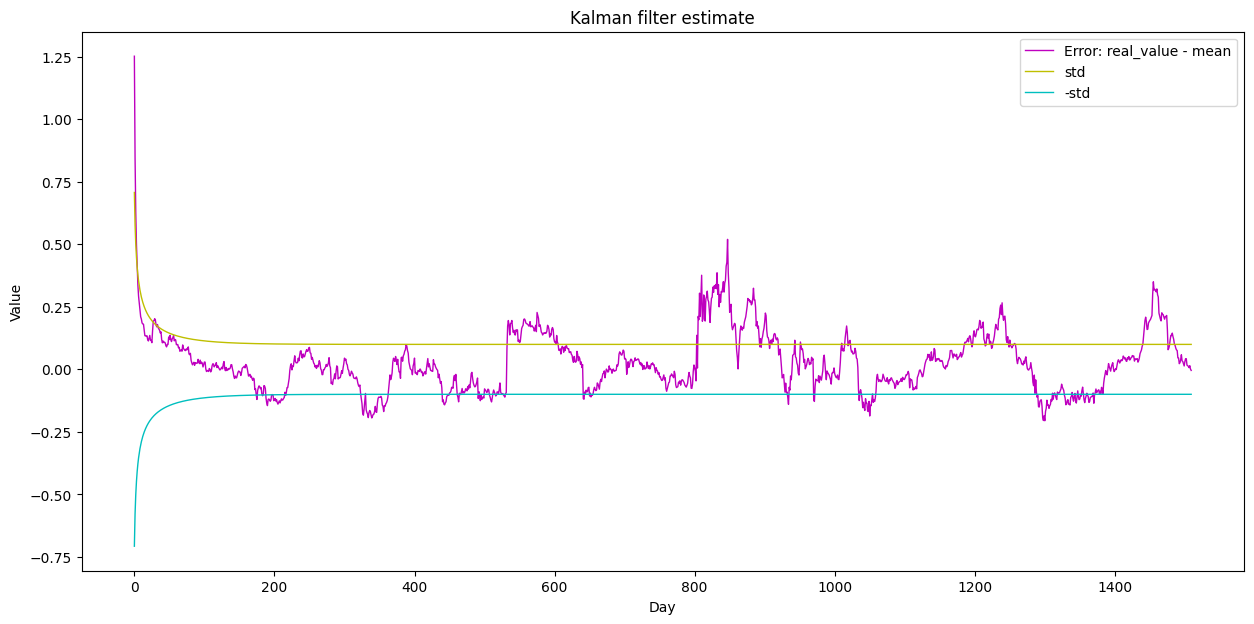

In [41]:
import yfinance as yf
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

# Download data for two stocks
data = yf.download("KO", start="2017-01-01", end="2022-12-31")
data1 = yf.download("PEP", start="2017-01-01", end="2022-12-31")

# Extract closing prices of the stocks
stock_1 = data1['Close']
stock_2 = data['Close']

# Calculate the ratio of the closing prices for pairs trading
ratio = stock_1 / stock_2
data['Ratio'] = ratio

# Initialize Kalman Filter
kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    initial_state_mean=0,
    initial_state_covariance=1,
    observation_covariance=1,
    transition_covariance=.0001
)

# Apply Kalman Filter to the ratio data
mean, cov = kf.filter(ratio)
mean, std = mean.squeeze(), np.std(cov.squeeze())

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(ratio.values - mean, 'm', lw=1)  # Plotting error: real_value - mean
plt.plot(np.sqrt(cov.squeeze()), 'y', lw=1)  # Plotting standard deviation
plt.plot(-np.sqrt(cov.squeeze()), 'c', lw=1)  # Plotting negative standard deviation
plt.title('Kalman filter estimate')
plt.legend(['Error: real_value - mean', 'std', '-std'])
plt.xlabel('Day')
plt.ylabel('Value')

# Calculate rolling mean and z_score
mean, cov = kf.filter(ratio)
data['mean'] = mean.squeeze()
data['cov'] = cov.squeeze()
data['std'] = np.sqrt(data['cov'])
data = data.dropna()
data['ma'] = data['Ratio'].rolling(5).mean()
data['z_score'] = (data['ma'] - data['mean']) / data['std']

# Display data
data.head()

# Perform Augmented Dickey-Fuller (ADF) test for cointegration
adf_result = adfuller(residuals.squeeze())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

In [35]:
mean, cov = kf.filter(ratio)

In [51]:
kf.filter_update(mean[-1], cov.squeeze()[-1])

(array([2.84439024]), array([[0.01005012]]))

In [50]:
cov.squeeze()[-1]

0.009950124999220229

<Axes: xlabel='Date'>

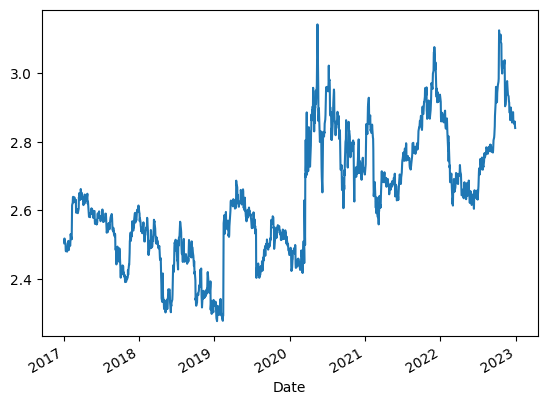

In [32]:
ratio.plot()

In [30]:
data

,Open,High,Low,Close,Adj Close,Volume,Ratio,mean,cov,std,ma,z_score
Date,,,,,,,,,,,,
2017-01-03,41.500000,41.810001,41.279999,41.799999,33.173557,14711000,2.503589,1.251794,0.500000,0.707107,NaN,NaN
2017-01-04,41.880001,41.970001,41.590000,41.650002,33.054520,9959400,2.517407,1.673721,0.333378,0.577389,NaN,NaN
2017-01-05,41.660000,41.860001,41.529999,41.750000,33.133881,8968300,2.508024,1.882365,0.250081,0.500081,NaN,NaN
2017-01-06,41.700001,41.810001,41.540001,41.740002,33.125942,10246600,2.505031,2.006970,0.200116,0.447343,NaN,NaN
2017-01-09,41.230000,41.580002,41.209999,41.320000,32.792622,14822500,2.503872,2.089862,0.166817,0.408432,2.507585,1.022748
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,63.500000,63.869999,63.200001,63.820000,61.377171,6463300,2.855844,2.844205,0.009950,0.099750,2.869478,0.253362
2022-12-27,63.930000,64.290001,63.709999,64.209999,61.752239,7320700,2.851114,2.844274,0.009950,0.099750,2.862552,0.183244
2022-12-28,64.459999,64.650002,63.490002,63.570000,61.136738,7159400,2.859053,2.844421,0.009950,0.099750,2.857106,0.127164
